In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from nbutil import imshow_multi
import random

In [4]:
from read_mnist import read_images, read_labels

def load_dataset(name):
    def featurize(image):
        return image.astype(float) / 255.0
    images = np.array([featurize(image) for image in read_images(name + '-images-idx3-ubyte')])
    labels = np.array([label for label in read_labels(name + '-labels-idx1-ubyte')])
    return images, labels

import os
test_in, test_out = load_dataset('../data/t10k')
train_in, train_out = load_dataset('../data/train')
nb_classes = 10

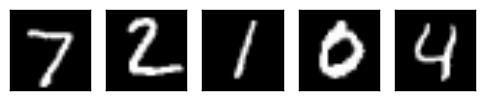

In [8]:
imshow_multi(test_in[0:5])


In [51]:
# two conv layers:
# 28x28x1 -> 14x14x16 -> 7x7x16

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.fc1 = nn.Linear(7 * 7 * 16, 256)
        self.fc2 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, (2,2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, (2,2))
        x = x.view(-1, 7*7*16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()


In [99]:
batch_size = 16
def minibatch(inputs, labels):
    idx = [random.randint(0, len(inputs)-1) for _ in xrange(batch_size)]
    img, label = np.array([inputs[i] for i in idx]), np.array([labels[i] for i in idx])
    return torch.from_numpy(img).float(), torch.from_numpy(label).long()


torch.FloatTensor


In [35]:
x = torch.rand(10, 10)
x.view(-1, 5, 2, 5).size()

torch.Size([2, 5, 2, 5])

In [79]:
crit = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

def train_step():
    opt.zero_grad()
    
    images, labels = minibatch(train_in, train_out)
    images = Variable(images)
    labels = Variable(labels)
    out_labels = net.forward(images)
    loss = crit(out_labels, labels)
    loss.backward()
    opt.step()


In [97]:
def compute_acc(n=20):
    # accuracy on 20 minibatches:
    correct = 0
    incorrect = 0
    for _ in xrange(n):
        images, labels = minibatch(test_in, test_out)
        images = Variable(images)
        labels = Variable(labels)
        predictions = F.softmax(net.forward(images)).data.numpy().argmax(axis=1)
        for a, b in zip(labels.data.numpy(), predictions):
            if a == b:
                correct += 1
            else:
                incorrect += 1
    score = correct / float(correct + incorrect)
    return score

compute_acc()

0.103125

In [100]:
for i in xrange(1000):
    train_step()
    if i % 20 == 0:
        score = compute_acc()
        print "{}% correct".format(int(score * 100))


13% correct
30% correct
26% correct
28% correct
35% correct
39% correct
39% correct
44% correct
45% correct
43% correct
58% correct
43% correct
51% correct
59% correct
61% correct
67% correct
75% correct
73% correct
69% correct
79% correct
79% correct
79% correct
80% correct
81% correct
81% correct
78% correct
85% correct
76% correct
84% correct
83% correct
85% correct
83% correct
82% correct
85% correct
83% correct
88% correct
86% correct
82% correct
85% correct
85% correct
87% correct
90% correct
88% correct
86% correct
89% correct
87% correct
88% correct
86% correct
87% correct
82% correct
